In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to  1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

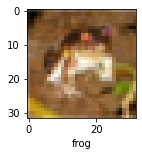

In [ ]:
plot_sample(X_train,y_train,0)

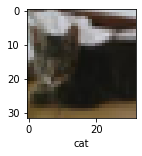

In [ ]:
plot_sample(X_train,y_train,9)

In [ ]:
#Normalizing the training data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Build simple artificial neural network for image classification


In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9406 - accuracy: 0.3016
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6475 - accuracy: 0.4216
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5545 - accuracy: 0.4502
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4922 - accuracy: 0.4778
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4333 - accuracy: 0.4956
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3866 - accuracy: 0.5151
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3557 - accuracy: 0.5231
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3107 - accuracy: 0.5373
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2875 - accuracy: 0.5480
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.253

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.55      0.58      1000
           1       0.55      0.80      0.65      1000
           2       0.32      0.62      0.42      1000
           3       0.39      0.35      0.37      1000
           4       0.40      0.51      0.45      1000
           5       0.47      0.36      0.41      1000
           6       0.64      0.47      0.54      1000
           7       0.70      0.46      0.56      1000
           8       0.72      0.56      0.63      1000
           9       0.71      0.41      0.52      1000

    accuracy                           0.51     10000
   macro avg       0.55      0.51      0.51     10000
weighted avg       0.55      0.51      0.51     10000



In [ ]:
#Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 10s 3ms/step - loss: 1.6773 - accuracy: 0.3896
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0946 - accuracy: 0.6198
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9569 - accuracy: 0.6673
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8523 - accuracy: 0.7052
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7832 - accuracy: 0.7298
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7261 - accuracy: 0.7479
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6689 - accuracy: 0.7675
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6170 - accuracy: 0.7834
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5764 - accuracy: 0.8007
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.53

In [ ]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.9021 - accuracy: 0.7050


[0.9020751118659973, 0.7049999833106995]

In [ ]:

y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.5510702e-04, 1.6491695e-05, 7.6610647e-04, 7.7585012e-01,
        5.0646882e-04, 2.1313457e-01, 8.9496998e-03, 1.3388837e-04,
        7.7764264e-05, 9.8440350e-06],
       [6.3896819e-04, 2.2432055e-02, 2.3272283e-07, 3.4384909e-06,
        3.7677535e-07, 4.6956977e-08, 9.6400783e-11, 1.2362168e-08,
        9.6976656e-01, 7.1582175e-03],
       [5.9729598e-02, 2.3916726e-01, 2.0456393e-03, 2.1402750e-02,
        2.7646314e-04, 1.2374719e-03, 4.7794156e-04, 2.4433506e-03,
        6.5391946e-01, 1.9300055e-02],
       [9.5671064e-01, 7.0349786e-05, 2.5900314e-03, 2.1510024e-03,
        2.3018913e-02, 2.4514511e-05, 6.2233565e-05, 3.3218719e-05,
        1.5125757e-02, 2.1338498e-04],
       [2.2210227e-06, 2.9298002e-07, 1.8897496e-02, 1.4748699e-02,
        8.0098517e-02, 1.6527573e-04, 8.8608438e-01, 1.5020181e-06,
        1.5647679e-06, 6.2220295e-08]], dtype=float32)

In [ ]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

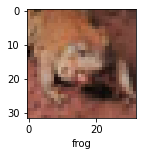

In [ ]:
plot_sample(X_test, y_test,5)


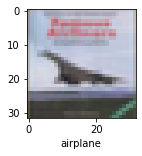

In [ ]:
plot_sample(X_test, y_test,3)


In [ ]:
classes[y_classes[3]]

'airplane'